# COVID-19 Statistical Model using Logistic Regression

### Importing Libraries

Importing libraries required for data manipulation (Pandas), plotting of graphs (Matplotlib), and performing mathematical operations (NumPy)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


plt.rcParams['font.serif'] = "Times New Roman"
plt.rcParams['font.family'] = "serif"

### Importing the Symptoms Dataset

Importing the dataset (COVID_Symptoms.csv) containing COVID lab results along with symptoms witnessed in the patients; all the values are min-max normalized (lie between 0 and 1 inclusive) for better modeling

In [2]:
raw_data = pd.read_csv("COVID_Symptoms.csv")

In [3]:
raw_data.shape

(1116, 18)

In [4]:
raw_data.head(5)

,Gender,Age,Fever,Body_Temperature,Chills,Muscle_Pain_Myalgias,Cough,Shortness_of_Breath_Dyspnea,Sore_Throat,Headache,Runny_Nose_Rhinorrhoea,Joint_Pain,Chest_Pain,Diarrhea,Malaise,Fatigue,Pneumonia,Result
0,0,0.36292,1,0.87500,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0.36292,1,1.00000,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0.57180,1,0.75000,0,0,1,1,0,0,0,0,0,0,0,0,0,1
3,1,0.63446,1,0.15625,1,0,0,0,1,1,0,0,0,0,0,0,0,1
4,0,0.68668,1,0.96875,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
# Randomizing the rows of the dataset for better modelling
from sklearn.utils import shuffle
data = shuffle(raw_data)

data.head()

,Gender,Age,Fever,Body_Temperature,Chills,Muscle_Pain_Myalgias,Cough,Shortness_of_Breath_Dyspnea,Sore_Throat,Headache,Runny_Nose_Rhinorrhoea,Joint_Pain,Chest_Pain,Diarrhea,Malaise,Fatigue,Pneumonia,Result
336,0,0.48825,1,0.78125,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1017,0,0.38381,0,0.09375,0,0,0,1,0,0,0,0,0,1,0,0,0,0
109,1,0.67624,0,0.00000,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1087,0,0.23760,0,0.09375,0,0,0,0,0,0,0,0,0,0,0,0,0,0
705,1,0.06005,0,0.09375,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# check if any null value is present
data.isnull().values.any()

False

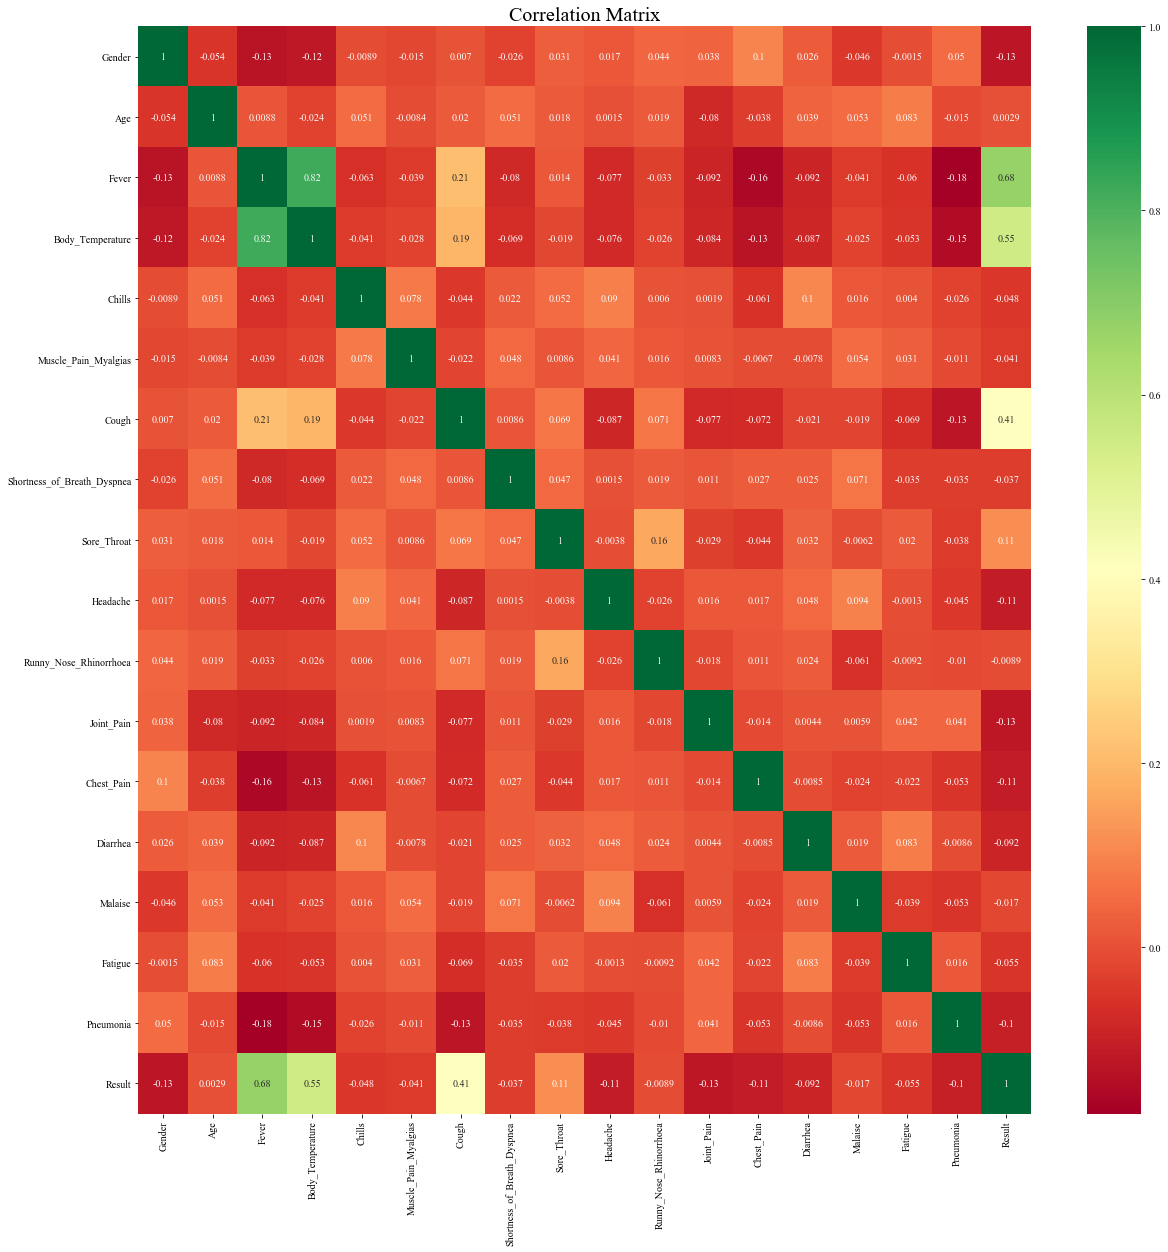

In [7]:
# Correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Get correlations of each feature in dataset
corr_matrix = data.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize = (20, 20))
plt.title("Correlation Matrix", fontsize = 20)

# Plot heat map
hm = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [8]:
# Balance between COVID +ve and -ve cases
covid_pos_count = len(data.loc[data['Result'] == 1])
covid_neg_count = len(data.loc[data['Result'] == 0])
                      
(covid_pos_count, covid_neg_count)

(598, 518)

### Splitting Dataset into Training and Testing Dataset

Shuffled Dataset is divided into the features (COVID Symptoms) and Lab Results (Result); Dataset is further divided in the 4:1 ratio between Training and Testing Dataset; Training Dataset is used while making the Logistic Regression model, while Testing Dataset is used to find the error in prediction and thus, allows the machine to improve the model

In [9]:
# Train Test Split

from sklearn.model_selection import train_test_split

feature_cols = ['Gender', 'Age', 'Fever', 'Body_Temperature', 'Chills', 'Muscle_Pain_Myalgias',
               'Cough', 'Shortness_of_Breath_Dyspnea', 'Sore_Throat', 'Headache', 'Runny_Nose_Rhinorrhoea',
               'Joint_Pain', 'Chest_Pain', 'Diarrhea', 'Malaise', 'Fatigue', 'Pneumonia']
predicted_class = ['Result']

In [10]:
X = data[feature_cols].values
y = data[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

### Logistic Regression ML Model

Importing the Scikit-learn library that allows the model to employ Logistic Regression as the prediction basis; the model is trained using the Training Dataset extracted from the previous step

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

C:\Users\archi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Testing of Model

Model makes prediction for the unseen Testing Dataset and then compares it with the actual results; it then tries to reduce the error; Evaluation Metrics are also shown

In [12]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = "macro")
prec = precision_score(y_test, y_pred, average = "macro")
rec = recall_score(y_test, y_pred, average = "macro")

#### Metric 1: Confusion Matrix

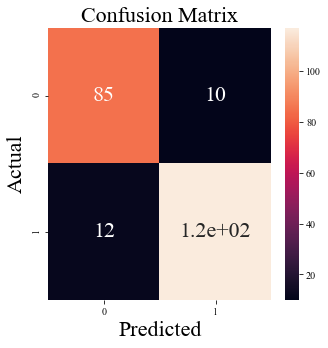

In [13]:
# Confusion Matrix
import seaborn as sns
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, annot_kws={"size": 22})
plt.xlabel("Predicted", fontsize = 22)
plt.ylabel("Actual", fontsize = 22)
plt.title("Confusion Matrix", fontsize = 22)
plt.show()

#### Metric 2: Accuracy Score

In [14]:
# Accuracy Score
acc

0.9017857142857143

In [15]:
#---or---
model.score(X_test, y_test)

0.9017857142857143

#### Metric 3: f1 Score

In [16]:
# f1 Score
f1

0.8997395833333333

#### Metric 4: Precision Score

In [17]:
# Precision Score
prec

0.8987742511567498

#### Metric 5: Recall Score

In [18]:
# Recall Score
rec

0.9008567931456548

### Plotting Graphs

Plotting graphs for various symptoms

#### Symptom 1 vs. Symptom 2 Graph

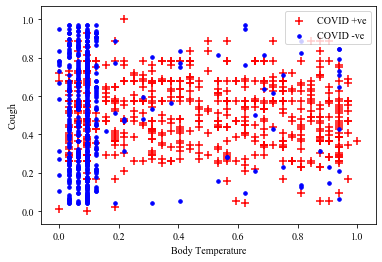

In [19]:
# 2D Plot
fig, ax = plt.subplots()

Xp = data['Body_Temperature'].values
Yp = data['Age'].values
Rp = data['Result'].values

scatter1 = ax.scatter(Xp[Rp==1],Yp[Rp==1], s = 50, c = 'r', marker='+')
scatter0 = ax.scatter(Xp[Rp==0],Yp[Rp==0], s = 50, c = 'b', marker='.')

ax.set_xlabel("Body Temperature")
ax.set_ylabel("Cough")

ax.legend([scatter1, scatter0], ['COVID +ve', 'COVID -ve'], loc="upper right")

plt.show()

#### Symptom 1 vs. Symptom 2 vs. Symptom 3 Graph

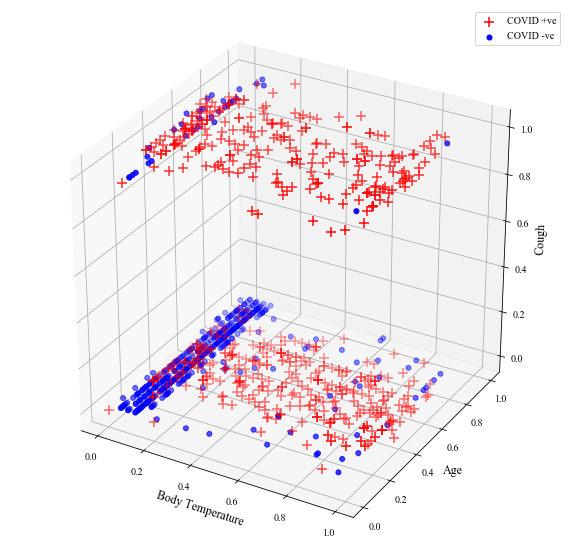

In [20]:
# 3D Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xp = data['Body_Temperature'].values
Yp = data['Age'].values
Zp = data['Cough'].values
Rp = data['Result'].values

scatter1 = ax.scatter(Xp[Rp==1],Yp[Rp==1], Zp[Rp==1], s = 100, c = 'r', marker='+')
scatter0 = ax.scatter(Xp[Rp==0],Yp[Rp==0], Zp[Rp==0], s = 100, c = 'b', marker='.')

ax.set_xlabel("Body Temperature", fontsize = 12)
ax.set_ylabel("Age", fontsize = 12)
ax.set_zlabel("Cough", fontsize = 12)

ax.legend([scatter1, scatter0], ['COVID +ve', 'COVID -ve'], loc="upper right")

plt.gcf().set_size_inches((10, 10))

plt.show()

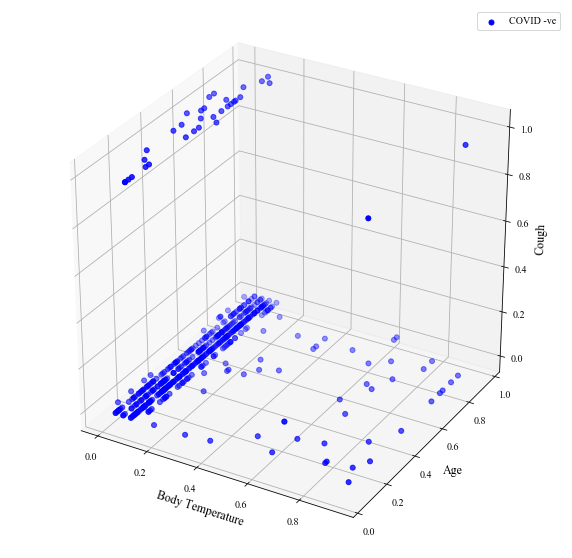

In [21]:
# 3D Plot
# COVID -ve Cases

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xp = data['Body_Temperature'].values
Yp = data['Age'].values
Zp = data['Cough'].values
Rp = data['Result'].values

#scatter1 = ax.scatter(Xp[Rp==1],Yp[Rp==1], Zp[Rp==1], s = 100, c = 'r', marker='+')
scatter0 = ax.scatter(Xp[Rp==0],Yp[Rp==0], Zp[Rp==0], s = 100, c = 'b', marker='.')

ax.set_xlabel("Body Temperature", fontsize = 12)
ax.set_ylabel("Age", fontsize = 12)
ax.set_zlabel("Cough", fontsize = 12)

#ax.legend([scatter1, scatter0], ['COVID +ve', 'COVID -ve'], loc="upper right")
ax.legend([scatter0], ['COVID -ve'], loc="upper right")

plt.gcf().set_size_inches((10, 10))

plt.show()

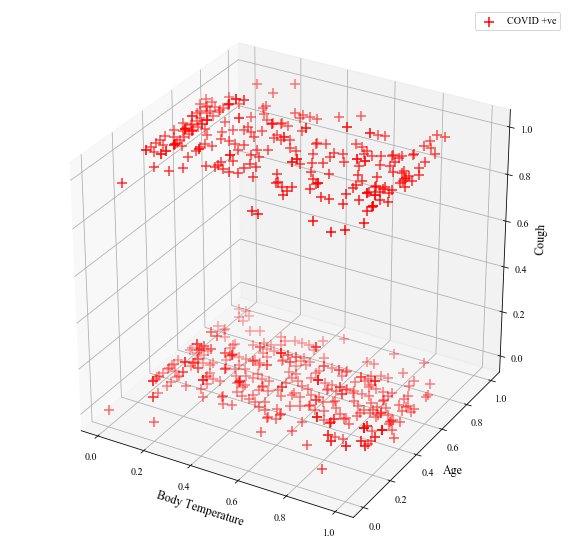

In [22]:
# 3D Plot
# COVID +ve Cases

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xp = data['Body_Temperature'].values
Yp = data['Age'].values
Zp = data['Cough'].values
Rp = data['Result'].values

scatter1 = ax.scatter(Xp[Rp==1],Yp[Rp==1], Zp[Rp==1], s = 100, c = 'r', marker='+')
#scatter0 = ax.scatter(Xp[Rp==0],Yp[Rp==0], Zp[Rp==0], s = 100, c = 'b', marker='.')

ax.set_xlabel("Body Temperature", fontsize = 12)
ax.set_ylabel("Age", fontsize = 12)
ax.set_zlabel("Cough", fontsize = 12)

#ax.legend([scatter1, scatter0], ['COVID +ve', 'COVID -ve'], loc="upper right")
ax.legend([scatter1], ['COVID +ve'], loc="upper right")

plt.gcf().set_size_inches((10, 10))

plt.show()